In [1]:
# Installation and imports of necessary packages
# !pip install pandas
# !pip install seaborn
# !pip install openpyxl
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the data set
df  = pd.read_excel('/Users/arjunkhatiwada/Documents/master_project_code/mp_cp_ak/e_commerce_dataset.xlsx',sheet_name='E Comm')
df_eda = df.copy()

In [3]:
# print the first five rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Checking info including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Checking descriptive statistics of dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
#Checking if data has duplicate entries
df[df.duplicated()].count()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [7]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter and show only the columns with missing values and percentage of missing with respect the total number of rows in the dataset
missing_columns = round(missing_values[missing_values > 0]*100/df.shape[0],2)
missing_columns

Tenure                         4.69
WarehouseToHome                4.46
HourSpendOnApp                 4.53
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
dtype: float64

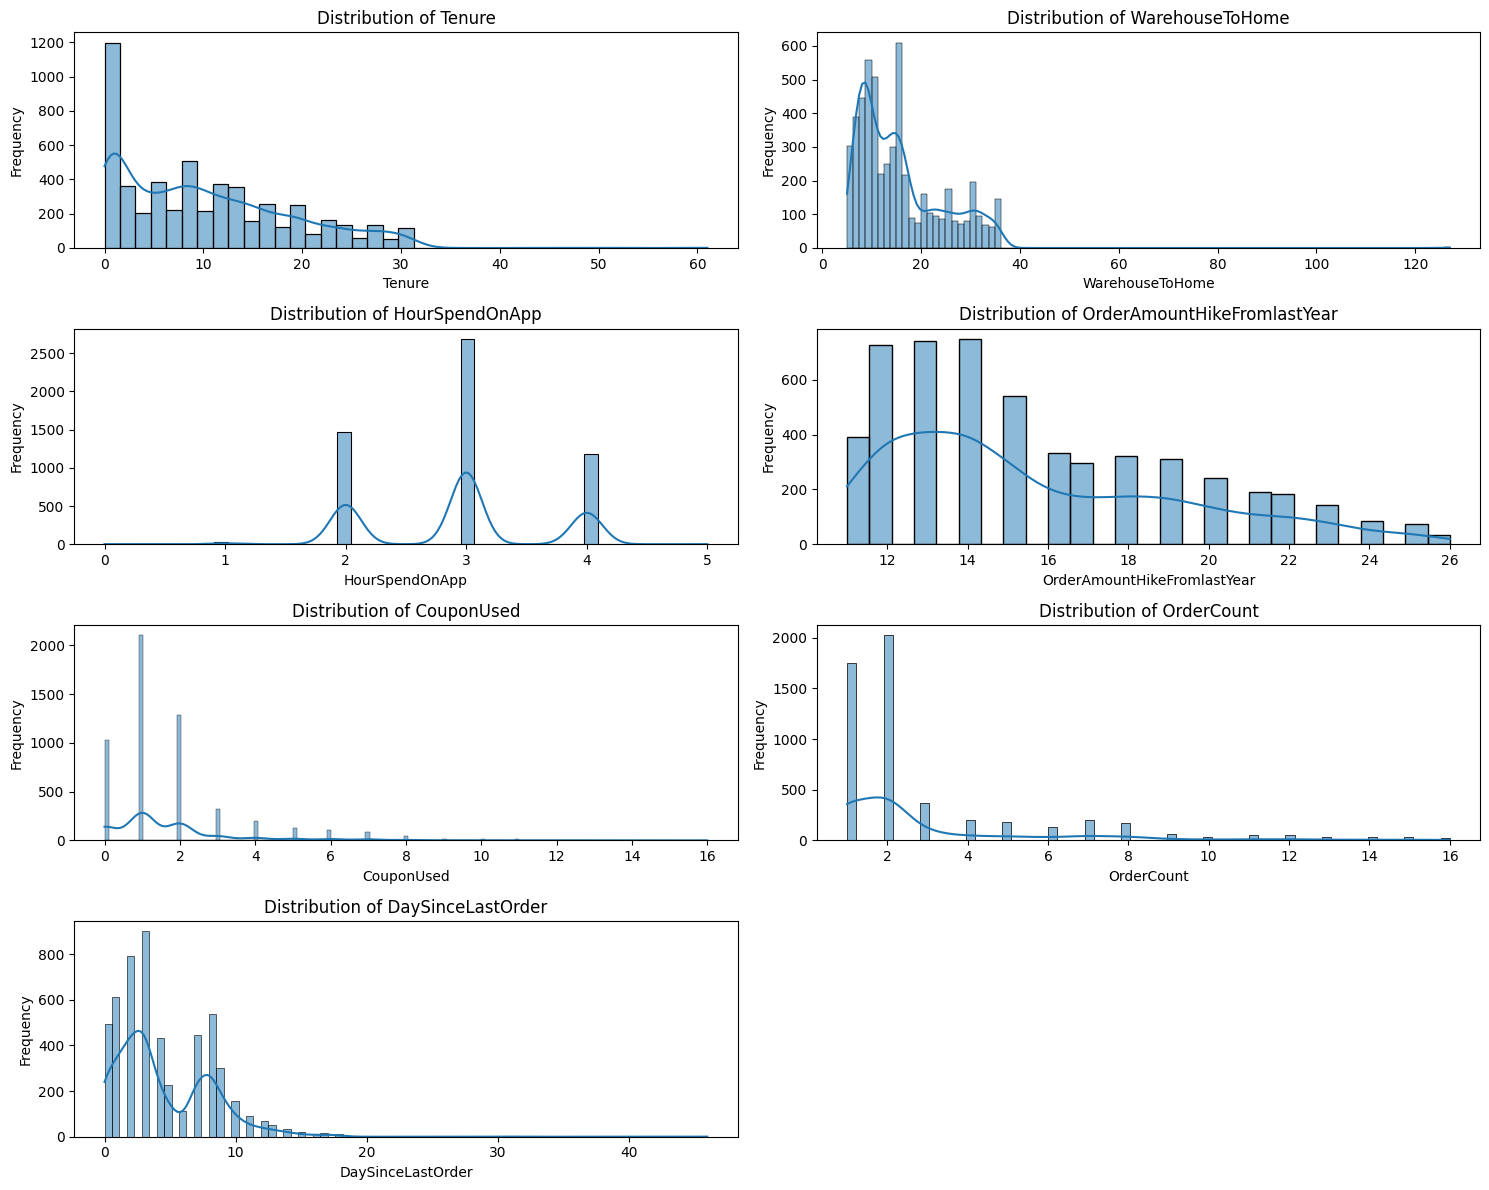

In [9]:
# List of columns with missing values
columns_with_missing = list(missing_columns.index)

# Set up the figure size for plotting
plt.figure(figsize=(15, 12))

# Loop through each column and plot the histogram
for i, col in enumerate(columns_with_missing, 1):
    plt.subplot(4, 2, i)  # Create a subplot grid
    sns.histplot(df[col], kde=True)  # Plot the histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

None of the histograms have a bell shape (i.e., none of the distributions are normally distributed), it means the data is likely skewed or contains outliers. In this case, using the median for imputing missing values would be the safest approach for most of the columns.

In [10]:
# Impute missing values with median for all columns
for col in columns_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
#Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

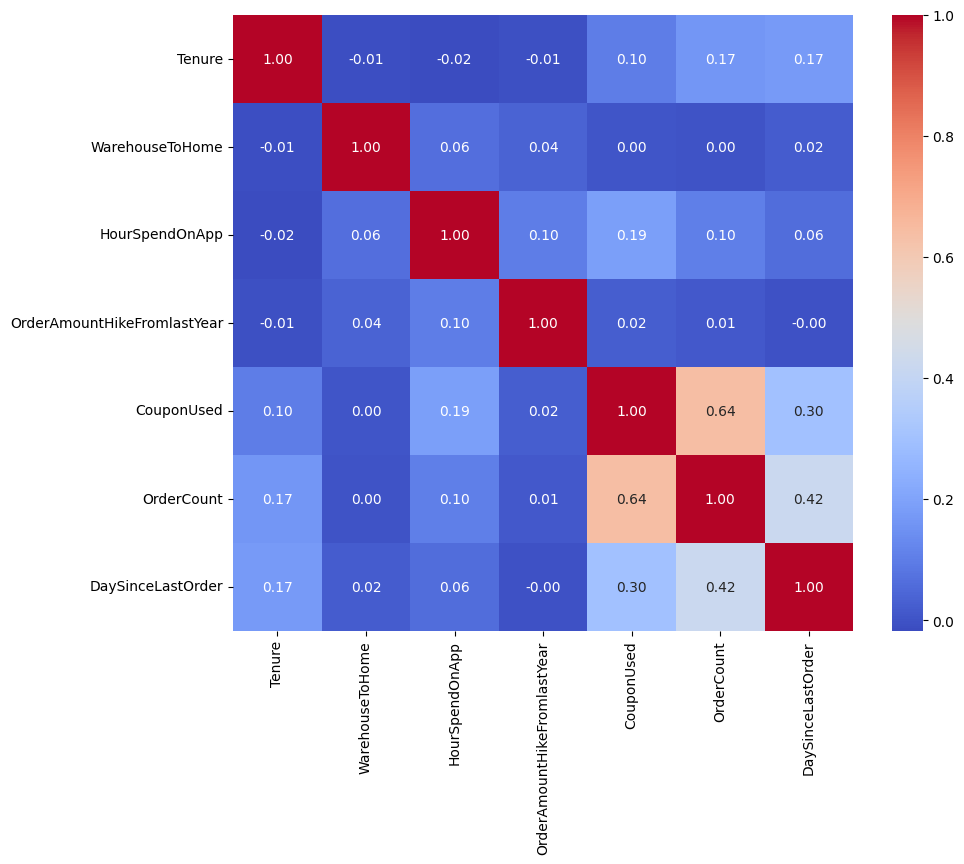

In [12]:
# Creating heatmap to analyse correleation between variables
correlation_matrix = df[columns_with_missing].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [13]:
categorical_df = df.select_dtypes(include=['object'])

In [14]:
categorical_df

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [15]:
# One-hot encode for categorical variables
df = pd.get_dummies(df, columns=list(categorical_df.columns), drop_first=True)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True


In [16]:
# Converting boolean (True/False) to integers (1/0) for all columns
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1


In [17]:
# Removing unnecessary columns
df.drop(['CustomerID'], axis=1, inplace=True)

In [18]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1


In [19]:
# !pip install statsmodels

In [20]:
# Function to check VIF
def check_vif(df,target_col):
    # Recalculate VIF for the remaining features
    X = df.drop(target_col, axis=1)  # Assuming 'target' is your target variable
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by = 'VIF',ascending = False)

In [21]:
check_vif(df,'Churn')

,Feature,VIF
12,CashbackAmount,66.919575
3,HourSpendOnApp,25.191965
8,OrderAmountHikeFromlastYear,19.254500
4,NumberOfDeviceRegistered,16.825080
18,PreferredPaymentMode_Debit Card,11.147545
17,PreferredPaymentMode_Credit Card,8.295314
1,CityTier,6.109338
5,SatisfactionScore,5.892480
2,WarehouseToHome,4.502614
19,PreferredPaymentMode_E wallet,4.428862


In [22]:
# Remove CashbackAmount from your dataset
df.drop('CashbackAmount', axis=1, inplace=True)

In [23]:
check_vif(df,'Churn')

,Feature,VIF
3,HourSpendOnApp,21.635219
8,OrderAmountHikeFromlastYear,17.569057
4,NumberOfDeviceRegistered,15.250732
17,PreferredPaymentMode_Debit Card,9.429121
16,PreferredPaymentMode_Credit Card,7.041512
1,CityTier,5.983942
5,SatisfactionScore,5.734858
2,WarehouseToHome,4.461940
26,MaritalStatus_Married,4.320408
6,NumberOfAddress,4.122394


In [24]:
# Remove HourSpendOnApp from your dataset
df.drop('HourSpendOnApp', axis=1, inplace=True)

In [25]:
check_vif(df,'Churn').head()

,Feature,VIF
7,OrderAmountHikeFromlastYear,17.010918
3,NumberOfDeviceRegistered,13.761173
16,PreferredPaymentMode_Debit Card,9.171575
15,PreferredPaymentMode_Credit Card,6.885220
1,CityTier,5.955755


In [26]:
# Remove OrderAmountHikeFromlastYear from your dataset
df.drop('OrderAmountHikeFromlastYear', axis=1, inplace=True)

In [27]:
check_vif(df,'Churn').head()

,Feature,VIF
3,NumberOfDeviceRegistered,13.119904
15,PreferredPaymentMode_Debit Card,8.427073
14,PreferredPaymentMode_Credit Card,6.315779
1,CityTier,5.899949
4,SatisfactionScore,5.642091


In [28]:
# Remove NumberOfDeviceRegistered Card from your dataset
df.drop('NumberOfDeviceRegistered', axis=1, inplace=True)

In [29]:
check_vif(df,'Churn').head()

,Feature,VIF
14,PreferredPaymentMode_Debit Card,7.651634
1,CityTier,5.809863
13,PreferredPaymentMode_Credit Card,5.781391
3,SatisfactionScore,5.593734
2,WarehouseToHome,4.293080


In [30]:
# Feature selection

X = df.drop('Churn', axis=1)
y = df['Churn']

model = RandomForestClassifier()
model.fit(X, y)

# Use feature importances to select features
selector = SelectFromModel(model, threshold='mean', prefit=True)
X_selected = selector.transform(X)

In [31]:
selected_features = selector.get_support()  # Get the boolean mask of selected features
feature_names = X.columns[selected_features]  # Get the names of selected features
feature_names

Index(['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderCount', 'DaySinceLastOrder'],
      dtype='object')

In [32]:
# Scaling the data
df_for_scaling = df.drop('Churn', axis=1)

# Create a list of numeric columns to scale
numeric_columns = df_for_scaling.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [33]:
# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable

# Optionally, check the shapes of X and y
print(X.shape, y.shape)

(5630, 25) (5630,)


In [34]:
# Spliting data into train and test

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
# Training Logistic regression model

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9733570159857904
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.97      0.87      0.92       190

    accuracy                           0.97      1126
   macro avg       0.97      0.93      0.95      1126
weighted avg       0.97      0.97      0.97      1126



Churn
0    4682
1     948
Name: count, dtype: int64
Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


<Axes: xlabel='Churn'>

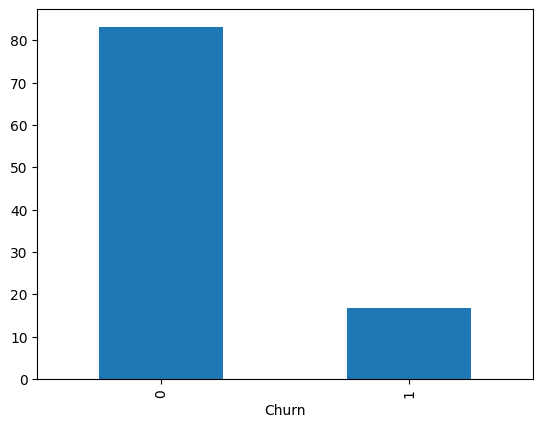

In [36]:
# Checking the distribution of the target variable (Churn)
print(df['Churn'].value_counts())

# To see the percentage distribution
print(df['Churn'].value_counts(normalize=True) * 100)

#Plot
(df['Churn'].value_counts(normalize=True) * 100).plot(kind ='bar')

In [37]:
# Resampling and training the model

# !pip install imbalanced-learn


# # Separate features and target
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print("Resampled data distribution:\n", y_train_resampled.value_counts())

# Train a model (e.g., Random Forest) on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Resampled data distribution:
 Churn
0    3746
1    3746
Name: count, dtype: int64
Accuracy: 0.9626998223801065
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.92      0.85      0.89       190

    accuracy                           0.96      1126
   macro avg       0.95      0.92      0.93      1126
weighted avg       0.96      0.96      0.96      1126



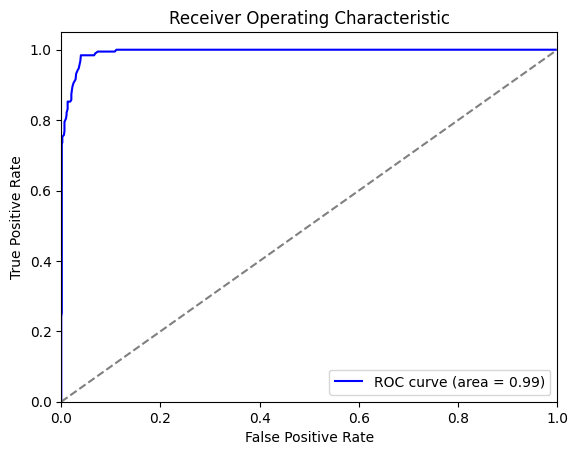

In [38]:
# Ploting ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Plotting AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

AUC: 0.9934772829509672


Having both AUC and ROC scores above 0.99 suggests that your model is performing exceptionally well! This means that your model can very accurately distinguish between the positive class (churn) and the negative class (non-churn), even across different decision thresholds. However, such a high score can sometimes indicate potential overfitting, depending on the nature of the data and the complexity of the model.

In [40]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC score: {cv_scores.mean()}")

Cross-validated AUC scores: [0.9997554  0.99790823 0.99907782 0.99899206 0.99859396]
Mean AUC score: 0.9988654934239246


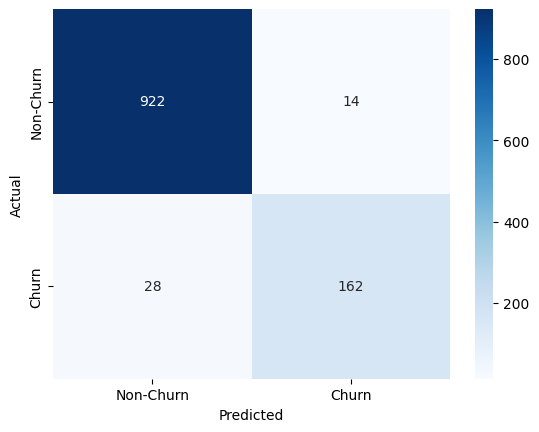

In [41]:
# Performace over Test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [42]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show the top important features
print(feature_importance.head(10))  # Top 10 most important features


                 Feature  Importance
0                 Tenure    0.248072
8      DaySinceLastOrder    0.083941
5               Complain    0.083606
3      SatisfactionScore    0.072976
2        WarehouseToHome    0.069215
4        NumberOfAddress    0.069022
6             CouponUsed    0.048397
7             OrderCount    0.043267
1               CityTier    0.033497
24  MaritalStatus_Single    0.032124


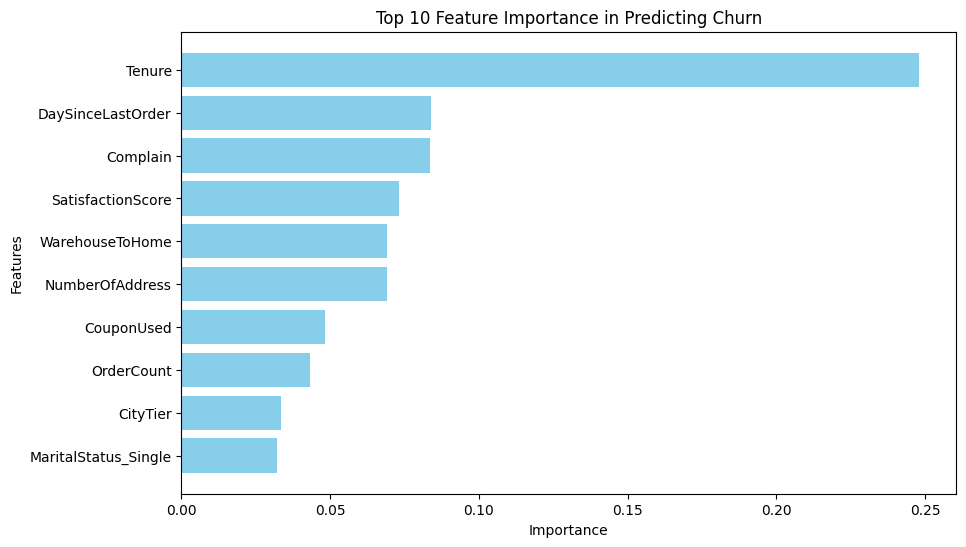

In [43]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance in Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [44]:
list(feature_importance[:10]['Feature'])

['Tenure',
 'DaySinceLastOrder',
 'Complain',
 'SatisfactionScore',
 'WarehouseToHome',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'CityTier',
 'MaritalStatus_Single']

In [45]:
def filter_col(l1,l2):
    l3 = []
    for item in l1:
        if item in l2:
            l3.append(item)
        elif item.split('_')[0] in l2:
            l3.append(item.split('_')[0]) 
    return l3

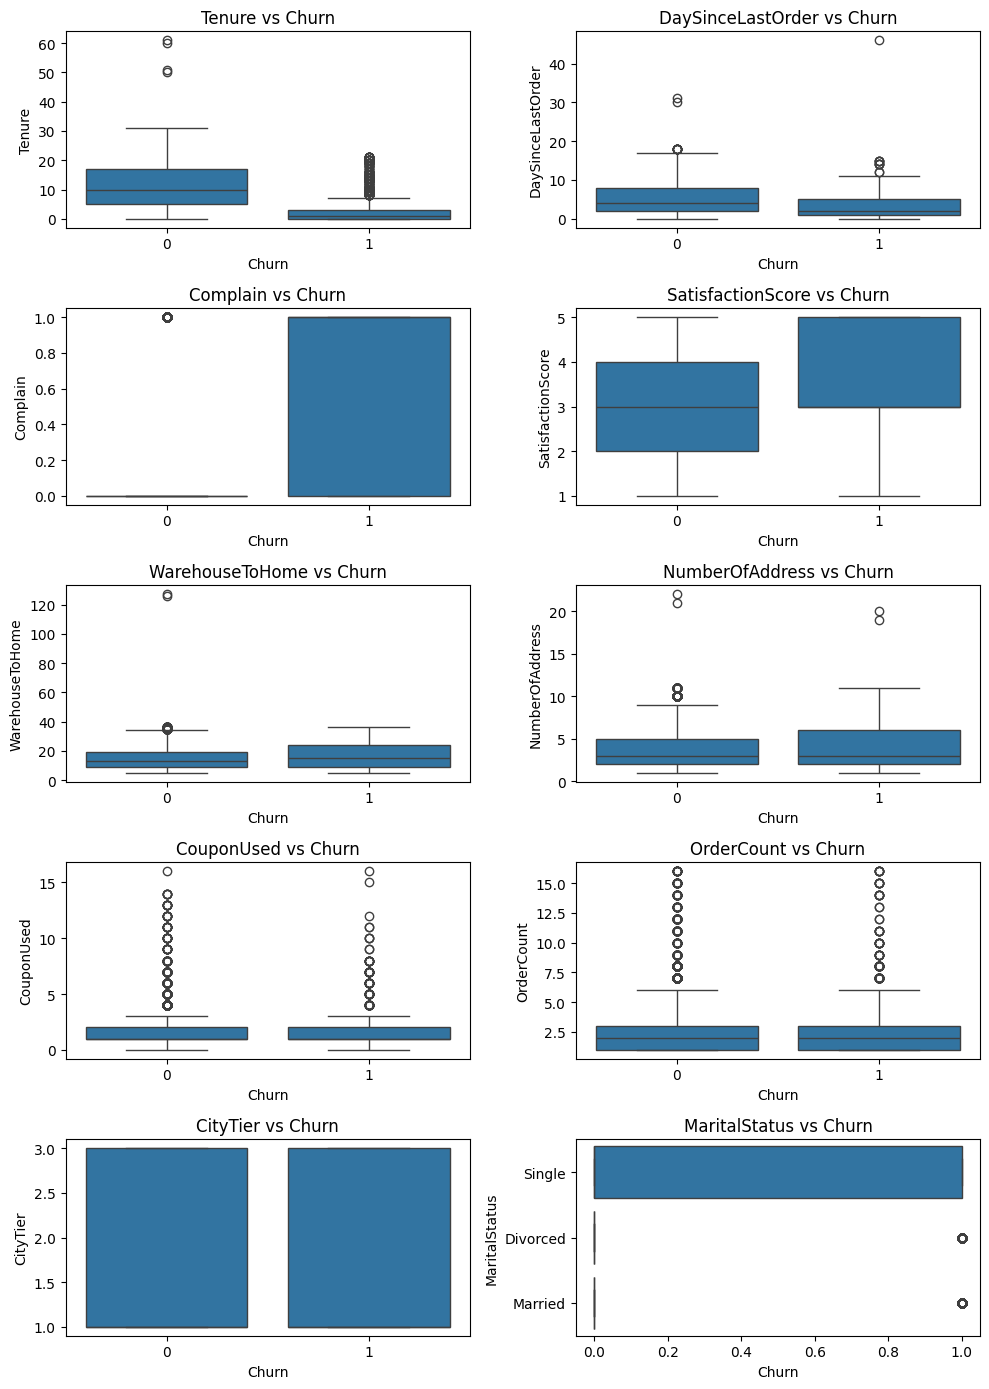

In [46]:
# Create customer segments based on top features (e.g., SatisfactionScore, OrderCount)
top_feature_cols = filter_col(list(feature_importance[:10]['Feature']),list(df_eda.columns))+['Churn']
customer_segments = df_eda[top_feature_cols]
# Create subplots: 2 rows, 2 columns (adjust this depending on how many features you want to plot)
fig, axes = plt.subplots(int(len(top_feature_cols)/2), 2, figsize=(10, 14))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over top features and create boxplots in subplots
for i, col in enumerate(top_feature_cols[:-1]):
    sns.boxplot(x='Churn', y=col, data=df_eda[top_feature_cols], ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

why feature selection?

why this model?

recall is important for this project?

it is okay to predict the customer would be churned even if customer is not churning becuase we would atmost give them proirity ehich is good for them, however if we predict non churn for the customer who would be churned then we will loose the customer.
Accuracy is high because data is very limited.

Result finding:
how: predict customer likely to churn -> personalized strategy or marketing to retain those group of customer  


Limitations:


data limitation
cutting edges models
personalized solutions could be made

Further research:

more data
cutting edges models
personalized solutions could be made

